# Handwriting Recognition using K-Means
The U.S. Postal Service has been using machine learning and scanning technologies since 1999. Because its postal offices have to look at roughly half a billion pieces of mail every day, they have done extensive research and developed very efficient algorithms for reading and understanding addresses. And not only the post office:

ATMs can recognize handwritten bank checks
Evernote can recognize handwritten task lists
Expensify can recognize handwritten receipts
But how do they do it?

In this project, you will be using K-means clustering (the algorithm behind this magic) and scikit-learn to cluster images of handwritten digits.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Load the Data

In [3]:
digits = datasets.load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

- What is the size of an image (in pixel)? 8x8 pixel
- Where is this dataset from? Bogazici University (Istanbul-Turkey)

In [5]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
len(digits.images)

1797

### Visualize Image
Let’s visualize the image at index 100

4


<Figure size 432x288 with 0 Axes>

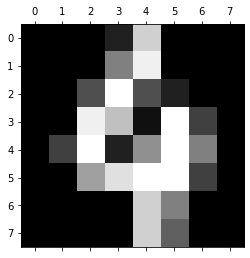

In [8]:
plt.gray()
plt.matshow(digits.images[100])

print(digits.target[100])

To take a look at 64 sample images. Copy and paste the code below:

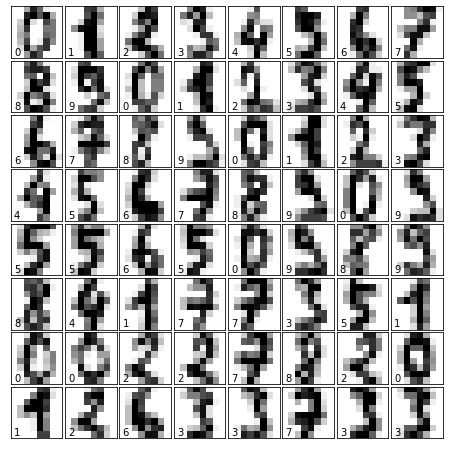

In [9]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # Label the image with the target value
    ax.text(0, 7, str(digits.target[i]))
    
plt.show()

## K-Means Clustering
Let’s cluster the 1797 different digit images into groups.

In [10]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=10, random_state=42)
model.fit(digits.data)

KMeans(n_clusters=10, random_state=42)

## Visualizing after K-Means

Let’s visualize all the centroids! Because data samples live in a 64-dimensional space, the centroids have values so they can be images!

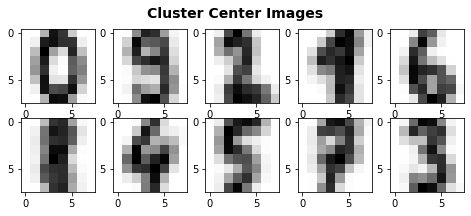

In [11]:
fig = plt.figure(figsize=(8,3))
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1+i)
    # Display images
    ax.imshow(model.cluster_centers_[i].reshape((8,8)), cmap=plt.cm.binary)

These are the centroids of handwriting from thirty different people collected by Bogazici University (Istanbul, Turkey):
- Index 0 looks like 0
- Index 1 looks like 9
- Index 2 looks like 2
- Index 3 looks like 1
- Index 4 looks like 6
- Index 5 looks like 8
- Index 6 looks like 4
- Index 7 looks like 5
- Index 8 looks like 7
- Index 9 looks like 3

Notice how the centroids that look like 1 and 8 look very similar and 1 and 4 also look very similar.

## Testing Your Model
- Instead of feeding new arrays into the model, let’s do something cooler!
Inside the right panel, go to test.html.
- Use your mouse to write a digit in each of the boxes and click Get Array.

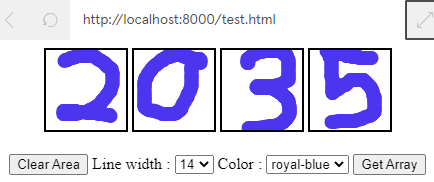

In [13]:
# result from get array of sampe hand writing above
new_samples = np.array([
[0.75,5.33,7.46,7.62,6.70,3.50,0.53,0.00,3.35,7.62,4.41,3.20,6.01,7.62,6.45,0.38,0.37,1.90,0.00,0.00,0.00,2.41,7.62,2.89,0.00,0.00,0.00,0.00,0.00,0.15,7.23,4.34,0.00,0.00,0.00,0.00,0.00,0.90,7.24,4.41,0.76,6.54,7.62,7.24,4.87,6.78,7.23,1.51,1.97,7.62,7.62,7.62,7.62,7.62,4.70,0.07,0.07,3.27,3.81,3.43,2.04,5.32,7.62,5.33],
[0.00,0.00,0.00,0.60,2.89,4.04,4.50,0.68,0.00,1.43,5.18,7.62,7.62,7.62,7.55,1.59,1.74,7.54,7.08,4.25,1.36,6.70,4.42,0.00,3.72,7.62,0.99,0.00,0.00,6.85,4.56,0.00,3.80,7.62,0.07,0.00,0.00,6.85,4.56,0.00,2.80,7.62,3.33,0.00,0.00,7.00,4.56,0.00,0.00,5.54,7.62,5.24,4.48,7.62,3.35,0.00,0.00,0.37,4.02,6.63,6.86,5.16,0.37,0.00],
[0.00,4.79,7.47,7.62,7.62,2.50,0.00,0.00,0.00,3.35,3.95,1.37,7.15,4.57,0.00,0.00,0.00,0.00,0.15,2.43,7.31,4.33,0.00,0.00,0.00,0.00,6.01,7.61,7.62,3.49,0.00,0.00,0.00,0.00,2.05,2.67,5.93,6.85,0.15,0.00,0.00,0.00,0.00,0.00,2.58,7.62,1.98,0.00,0.00,0.76,2.67,4.57,6.09,7.62,1.82,0.00,0.00,5.49,7.62,6.93,5.64,3.11,0.00,0.00],
[0.00,0.15,3.27,4.57,4.57,4.57,2.89,0.00,0.68,6.15,7.62,6.32,6.47,7.62,4.87,0.00,3.49,7.62,2.65,0.00,1.98,7.62,2.43,0.00,4.56,6.93,0.00,0.00,0.30,7.39,4.93,0.00,4.56,6.85,0.00,0.00,0.00,4.41,7.46,0.38,4.56,7.00,0.00,0.00,0.00,3.04,7.62,0.76,3.11,7.62,4.54,1.98,1.44,5.62,7.54,0.53,0.07,4.61,7.61,7.61,7.62,7.39,3.33,0.00]
])

In [14]:
new_labels = model.predict(new_samples)
print(new_labels)

[0 0 9 1]


<b>But wait, because this is a clustering algorithm, we don’t know which label is which.</b>

In [15]:
for i in range(len(new_labels)):
  if new_labels[i] == 0:
    print(0, end='')
  elif new_labels[i] == 1:
    print(9, end='')
  elif new_labels[i] == 2:
    print(2, end='')
  elif new_labels[i] == 3:
    print(1, end='')
  elif new_labels[i] == 4:
    print(6, end='')
  elif new_labels[i] == 5:
    print(8, end='')
  elif new_labels[i] == 6:
    print(4, end='')
  elif new_labels[i] == 7:
    print(5, end='')
  elif new_labels[i] == 8:
    print(7, end='')
  elif new_labels[i] == 9:
    print(3, end='')

0039

The model doesn't recognize the sample.

note :
Remember, this model is trained on handwritten digits of 30 Turkish people (from the 1990’s).